# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from scipy.stats import randint
from sklearn.model_selection import cross_val_score



The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [9]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))


Text(0, 0.5, 'Loss function')

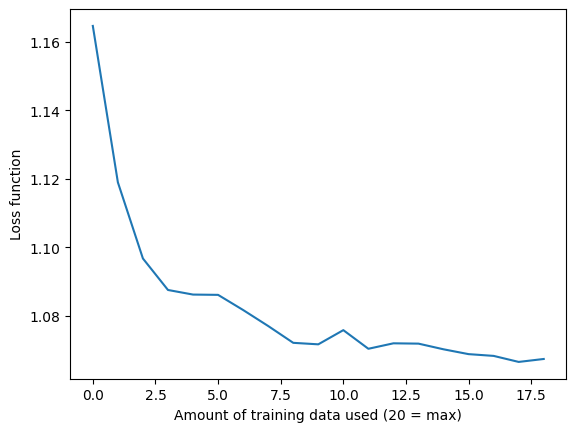

In [11]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [12]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

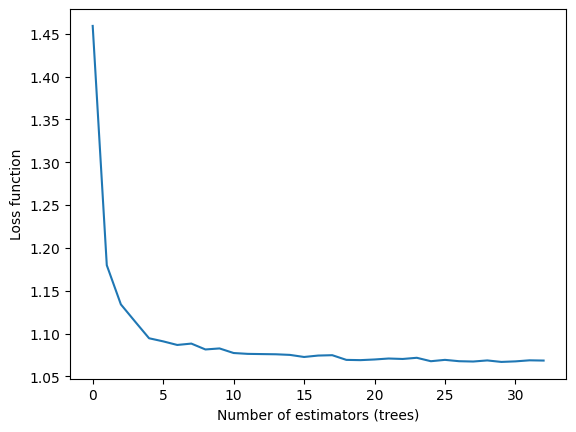

In [13]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

**My Answer**

If I had to cut one of the two plots, I would cut the plot showing the loss function versus the number of estimators (trees). The plot of loss versus amount of training data used is more important because it shows a clear and fundamental relationship between data quantity and model performance. It reveals how adding more data improves the model up to a point, which is a key insight for training any machine learning model. The “amount of training data used” should definitely be on the x-axis for that plot, as it directly affects learning. The number of estimators plot is less interesting because improvements are smaller and less consistent, making it less useful for understanding core model behavior.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

CKD dataset

In [ ]:
# Load data
df = pd.read_csv(r'C:\Users\annma\OneDrive\Desktop\CAPSTONE STUFF\Chronic_Kidney_Dsease_data.csv')


# Drop irrelevant columns
df = df.drop(columns=['PatientID', 'DoctorInCharge'])

# Define features and target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Split data for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit model on training set
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate initial model
print("Initial Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Hyperparameter tuning grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best hyperparameters:", grid_search.best_params_)
print("Best CV accuracy from GridSearch:", grid_search.best_score_)

# Evaluate best model on test data
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)

print("Final Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Final Classification Report:\n", classification_report(y_test, y_pred_best))
print("Final Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Initial Model Accuracy: 0.9307228915662651
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.08        24
           1       0.93      1.00      0.96       308

    accuracy                           0.93       332
   macro avg       0.97      0.52      0.52       332
weighted avg       0.94      0.93      0.90       332

Cross-validation accuracy scores: [0.9186747  0.9186747  0.92168675 0.9186747  0.918429  ]
Mean CV accuracy: 0.9192279692789285
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV accuracy from GridSearch: 0.9192279692789285
Final Model Accuracy: 0.9307228915662651
Final Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.08        24
           1       0.93      1.00      0.96       308

    accuracy                           0.93       332
   macro avg       0.97   

The initial random forest model achieved an accuracy of approximately 93%. However, the confusion matrix and classification report reveal a strong class imbalance in the dataset. The model almost exclusively predicts the majority class (class 1) and performs poorly on the minority class (class 0), as shown by the very low recall (4%) for class 0. This imbalance causes the accuracy metric to be misleading.

To address this, I will incorporate class weighting in the random forest.


In [ ]:
# Initialize Random Forest with balanced class weights to handle imbalance
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit model on training set
rf_balanced.fit(X_train, y_train)

# Predict on test set
y_pred_balanced = rf_balanced.predict(X_test)

# Evaluate performance
print("Balanced Class Weight Model Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))

# Cross-validation with balanced model
cv_scores_balanced = cross_val_score(rf_balanced, X, y, cv=5, scoring='accuracy')
print("Balanced model cross-validation accuracy scores:", cv_scores_balanced)
print("Mean CV accuracy (balanced model):", cv_scores_balanced.mean())


Balanced Class Weight Model Accuracy: 0.927710843373494
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.93      1.00      0.96       308

    accuracy                           0.93       332
   macro avg       0.46      0.50      0.48       332
weighted avg       0.86      0.93      0.89       332

Confusion Matrix:
 [[  0  24]
 [  0 308]]


c:\Users\annma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\annma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\annma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

Balanced model cross-validation accuracy scores: [0.9186747  0.92168675 0.9186747  0.9186747  0.918429  ]
Mean CV accuracy (balanced model): 0.9192279692789285


The previous attempt to handle class imbalance using class weights did not improve detection of the minority class. To further mitigate the imbalance, I will apply undersampling by reducing the majority class in the training set to match the size of the minority class. This approach helps the model learn from a balanced dataset, improving its ability to identify minority class instances while potentially sacrificing some overall accuracy.


In [ ]:
# Combine features and target for easy sampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['Diagnosis'] == 1]
minority_class = train_data[train_data['Diagnosis'] == 0]

# Downsample majority class to minority class size
majority_downsampled = resample(
    majority_class,
    replace=False,       # sample without replacement
    n_samples=len(minority_class),  # match minority class size
    random_state=42
)

# Combine minority class with downsampled majority class
balanced_train_data = pd.concat([majority_downsampled, minority_class])

# Separate features and target again
X_train_balanced = balanced_train_data.drop(columns=['Diagnosis'])
y_train_balanced = balanced_train_data['Diagnosis']

# Train Random Forest on balanced data
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)

# Predict on original test set
y_pred_balanced = rf_balanced.predict(X_test)

# Evaluate
print("Balanced (undersampled) Random Forest Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))


Balanced (undersampled) Random Forest Accuracy: 0.7710843373493976
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.75      0.32        24
           1       0.98      0.77      0.86       308

    accuracy                           0.77       332
   macro avg       0.59      0.76      0.59       332
weighted avg       0.92      0.77      0.82       332

Confusion Matrix:
 [[ 18   6]
 [ 70 238]]


After applying undersampling to balance the training data, the model's recall for the minority class improved significantly to 75%, indicating better identification of minority cases. However, the overall accuracy decreased to approximately 77%, reflecting a trade-off between sensitivity and accuracy. Precision for the minority class remains low, suggesting the model produces some false positives. This undersampling approach provides a more balanced model performance compared to the original imbalanced model.


In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with Random Forest
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearch on balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Show best parameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best CV accuracy from GridSearch:", grid_search.best_score_)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV accuracy from GridSearch: 0.7572727272727272


Using GridSearchCV on the balanced training data, the best hyperparameters were identified as `max_depth=None`, `min_samples_leaf=1`, `min_samples_split=5`, and `n_estimators=200`. 




In [ ]:
best_rf = grid_search.best_estimator_

# Train on balanced training data
best_rf.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred_best = best_rf.predict(X_test)



print("Final Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Final Classification Report:\n", classification_report(y_test, y_pred_best))
print("Final Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Final Model Accuracy: 0.7921686746987951
Final Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.75      0.34        24
           1       0.98      0.80      0.88       308

    accuracy                           0.79       332
   macro avg       0.60      0.77      0.61       332
weighted avg       0.92      0.79      0.84       332

Final Confusion Matrix:
 [[ 18   6]
 [ 63 245]]


The tuned random forest model achieved an overall accuracy of approximately **79.2%** on the test set. 

Examining class-specific metrics:
- The model demonstrated a **recall of 75%** for the minority class (class 0), indicating it correctly identified most cases in this group.
- However, the **precision for class 0 was relatively low at 22%**, reflecting some false positives.
- For the majority class (class 1), the model achieved high precision (98%) and good recall (80%), resulting in a strong F1-score of 0.88.

The confusion matrix confirms this balance, with 18 true positives and 6 false negatives for the minority class, and 245 true negatives and 63 false positives for the majority class.

Overall, these results show a reasonable trade-off between sensitivity and specificity given the data imbalance. The model effectively improves minority class detection compared to the initial unbalanced model but still allows some misclassification.




### Next Steps

To further enhance model performance, especially to improve minority class precision and overall robustness, we will proceed with **fine-tuning hyperparameters** using a broader search space and potentially alternative search methods like randomized search.

In [ ]:

# Define a larger hyperparameter distribution
param_dist = {
    'n_estimators': randint(50, 400),
    'max_depth': [None] + list(range(5, 31, 5)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,            # number of parameter settings sampled
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit to balanced training data
random_search.fit(X_train_balanced, y_train_balanced)

print("Best hyperparameters found:", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)

# Evaluate best model on test set
best_rf_random = random_search.best_estimator_
best_rf_random.fit(X_train_balanced, y_train_balanced)
y_pred_random = best_rf_random.predict(X_test)



print("Randomized Search Model Accuracy:", accuracy_score(y_test, y_pred_random))
print("Classification Report:\n", classification_report(y_test, y_pred_random))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters found: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 264}
Best CV accuracy: 0.7709090909090909
Randomized Search Model Accuracy: 0.8373493975903614
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.75      0.40        24
           1       0.98      0.84      0.91       308

    accuracy                           0.84       332
   macro avg       0.63      0.80      0.65       332
weighted avg       0.93      0.84      0.87       332

Confusion Matrix:
 [[ 18   6]
 [ 48 260]]


Now lets input these new parameters 

In [32]:
best_params = random_search.best_params_

best_rf = RandomForestClassifier(
    random_state=42,
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features']
)

best_rf.fit(X_train_balanced, y_train_balanced)
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Final Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final Tuned Model Accuracy: 0.8373493975903614
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.75      0.40        24
           1       0.98      0.84      0.91       308

    accuracy                           0.84       332
   macro avg       0.63      0.80      0.65       332
weighted avg       0.93      0.84      0.87       332

Confusion Matrix:
 [[ 18   6]
 [ 48 260]]


**Summary**

The final Random Forest model achieved an accuracy of approximately 83.7% on the test set, with a strong recall of 75% for the minority class (non-CKD), indicating it successfully identifies most patients without the disease. However, the precision for this class remains relatively low at 27%, reflecting some false positives. The model performs very well on the majority class, with high precision and recall. These results highlight a good balance between sensitivity and specificity, especially given the class imbalance in the dataset. Moving forward, to further improve minority class precision and overall model robustness, techniques such as oversampling the minority class and exploring alternative classifiers should be considered.

**Diabetes Dataset**

In [ ]:
# Load the diabetes dataset
df = pd.read_csv(r'C:\Users\annma\OneDrive\Desktop\CAPSTONE STUFF\diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Define features and target
X = df.drop(columns=['Diabetes_binary']) 
y = df['Diabetes_binary']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate initial model
print("Initial Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Initial Model Accuracy: 0.7371101209420751
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

Confusion Matrix:
 [[4921 2169]
 [1548 5501]]


The initial Random Forest model achieved an overall accuracy of approximately 73.7%. Precision and recall are fairly balanced between diabetic and non-diabetic classes, with slightly higher recall for the diabetic class (78%) indicating the model identifies most positive cases effectively. The confusion matrix shows that while the model correctly classifies many patients, there remain notable false positives and false negatives, suggesting room for improvement through further validation and tuning.


In [ ]:
# Perform cross-validation
# Initialize a fresh Random Forest model
rf_cv = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_cv, X, y, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation accuracy scores: [0.73053257 0.73654431 0.73963786 0.73985005 0.73843542]
Mean CV accuracy: 0.7370000413512582


The 5-fold cross-validation yielded accuracy scores ranging from approximately 73.1% to 73.9% across the folds, demonstrating stable and consistent model performance. The mean cross-validation accuracy of 73.7% aligns closely with the initial test accuracy, reinforcing confidence in the model’s ability to generalize across different subsets of the dataset.


In [ ]:

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearch on entire dataset
grid_search.fit(X, y)

print("Best hyperparameters:", grid_search.best_params_)
print("Best CV accuracy from GridSearch:", grid_search.best_score_)


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV accuracy from GridSearch: 0.750679139638897


In [43]:
# Extract best estimator from grid search
best_rf = grid_search.best_estimator_

# Train on training data
best_rf.fit(X_train, y_train)

# Predict on test set
y_pred = best_rf.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Tuned Model Accuracy: 0.7516090246834995
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Confusion Matrix:
 [[5008 2082]
 [1430 5619]]


The tuned Random Forest model achieved an accuracy of approximately 75.2% on the test set. Precision and recall are well balanced between the two classes, with the model correctly identifying 71% of the negative class (class 0) and 80% of the positive class (class 1). The F1-scores are similarly balanced, indicating consistent performance across classes. The confusion matrix shows a moderate number of false positives and false negatives, suggesting that while the model is effective, there is room for improvement in reducing misclassifications. So lets do a randomized search!

In [ ]:
# Define hyperparameter distributions
param_dist = {
    'n_estimators': randint(50, 400),
    'max_depth': [None] + list(range(5, 31, 5)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

print("Best hyperparameters found:", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters found: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 356}
Best CV accuracy: 0.7506586774484061


In [45]:
# Train final model with best hyperparameters
best_rf_random = RandomForestClassifier(
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=6,
    n_estimators=356,
    random_state=42
)

best_rf_random.fit(X_train, y_train)

# Predict on test set
y_pred_random = best_rf_random.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Final Randomized Search Model Accuracy:", accuracy_score(y_test, y_pred_random))
print("Classification Report:\n", classification_report(y_test, y_pred_random))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random))


Final Randomized Search Model Accuracy: 0.752528467359785
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Confusion Matrix:
 [[5013 2077]
 [1422 5627]]


The Random Forest model trained with hyperparameters optimized via randomized search achieved an accuracy of approximately 75.3% on the test set. Precision and recall remain balanced between the two classes, with the model correctly identifying 71% of the negative class and 80% of the positive class. F1-scores for both classes are consistent, indicating steady performance across groups. The confusion matrix shows a modest number of false positives and false negatives, demonstrating the model’s effectiveness while highlighting areas for potential improvement.


**Summary**

The Random Forest model demonstrated solid and balanced performance on the diabetes dataset, effectively distinguishing between diabetic and non-diabetic individuals. Hyperparameter tuning through both grid and randomized search improved model accuracy and robustness. While the model achieves good recall and precision for both classes, some misclassifications remain, suggesting opportunities for further refinement. Overall, this modeling approach provides a reliable framework for predicting diabetes status based on health indicators and supports its potential use in clinical decision-making or public health monitoring.

**Hypertension Dataset**

Lets clean this up since its a new dataset

In [ ]:
# Load sample dataset
df = pd.read_csv(r'C:\Users\annma\OneDrive\Desktop\CAPSTONE STUFF\brfss_2023_full.csv')

# Keep only rows where BPHIGH6 is 1 (Yes) or 3 (No)
df_clean = df[df['BPHIGH6'].isin([1, 3])].copy()

# Map 1 to 1 (has hypertension) and 3 to 0 (no hypertension)
df_clean['BPHIGH6'] = df_clean['BPHIGH6'].map({1: 1, 3: 0})

# Drop non-numeric columns that cause issues
cols_to_drop = ['IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO']
df_clean = df_clean.drop(columns=cols_to_drop, errors='ignore')

# Check value counts to confirm
print(df_clean['BPHIGH6'].value_counts())

# Define features and target
X = df_clean.drop(columns=['BPHIGH6'])
y = df_clean['BPHIGH6']


BPHIGH6
0    247855
1    176222
Name: count, dtype: int64


Looks like some class imbalance we can fix that later

In [ ]:

X = X.drop(columns=['_RFHYPE6'], errors='ignore')


# Split the data (with stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)


# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49571
           1       1.00      1.00      1.00     35245

    accuracy                           1.00     84816
   macro avg       1.00      1.00      1.00     84816
weighted avg       1.00      1.00      1.00     84816

Confusion Matrix:
 [[49571     0]
 [    0 35245]]


Umm this seems too perfect? Is it leaking?

In [ ]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
correlations = X[numeric_cols].apply(lambda col: np.corrcoef(col, y)[0, 1])
print(correlations.sort_values(ascending=False).head(10))


_AGE80      0.382827
_AGE_G      0.375816
_AGEG5YR    0.369871
_AGE65YR    0.277869
_HCVU653    0.276249
_RFHLTH     0.135210
EXERANY2    0.105164
_TOTINDA    0.097345
_PHYS14D    0.097091
_RAWRAKE    0.080561
dtype: float64


In [11]:
non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: []


No other features have a perfect correlation like _RFHYPE6 did, so that’s good.

The highest correlated features are age-related variables (AGE80, _AGE_G, _AGEG5YR, _AGE65YR) and some health/activity variables, which makes sense clinically.

In [ ]:
# Initialize Random Forest classifier
rf_cv = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation on the full data sequentially
cv_scores = cross_val_score(rf_cv, X, y, cv=5, scoring='accuracy', n_jobs=1)

print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation accuracy scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


Top 10 Feature Importances:
1. BPMEDS1: 0.5424
2. CHOLMED3: 0.0201
3. FC601_: 0.0156
4. _AGE80: 0.0139
5. _AGEG5YR: 0.0120
6. _RFCHOL3: 0.0110
7. _BMI5: 0.0106
8. DIABAGE4: 0.0098
9. FALL12MN: 0.0090
10. _AGE_G: 0.0089


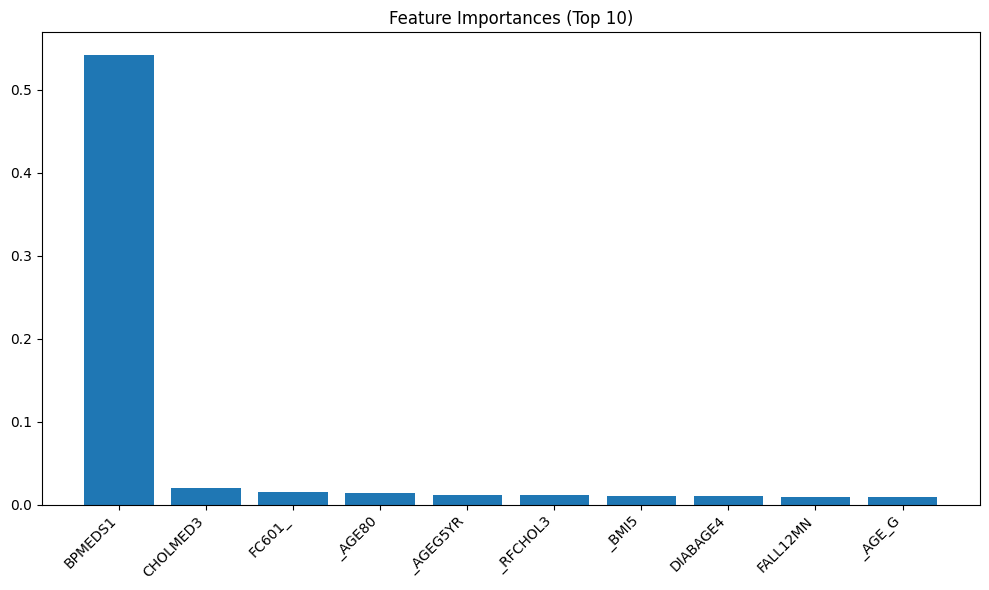

In [ ]:

# Keep only rows where BPHIGH6 is 1 (Yes) or 3 (No)
df_clean = df[df['BPHIGH6'].isin([1, 3])].copy()

# Map 1 to 1 (hypertension) and 3 to 0 (no hypertension)
df_clean['BPHIGH6'] = df_clean['BPHIGH6'].map({1: 1, 3: 0})

# Drop problematic columns
cols_to_drop = ['IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO', '_RFHYPE6']
df_clean = df_clean.drop(columns=cols_to_drop, errors='ignore')

# Define features and target
X = df_clean.drop(columns=['BPHIGH6'])
y = df_clean['BPHIGH6']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Print top 10 features
print("Top 10 Feature Importances:")
for i in range(10):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importances (Top 10)")
plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), feature_names[indices[:10]], rotation=45, ha='right')
plt.tight_layout()
plt.show()


looks like blood pressure medication is effecting the results duh!

In [ ]:

# Drop BPMEDS1 now to remove direct medication info
X_no_bpm = df_clean.drop(columns=['BPHIGH6', 'BPMEDS1'], errors='ignore')
y = df_clean['BPHIGH6']

# Split data with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X_no_bpm, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest without BPMEDS1
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Model Accuracy without BPMEDS1:", accuracy_score(y_test, y_pred))
print("Classification Report without BPMEDS1:\n", classification_report(y_test, y_pred))
print("Confusion Matrix without BPMEDS1:\n", confusion_matrix(y_test, y_pred))


Model Accuracy without BPMEDS1: 0.7408389926428975
Classification Report without BPMEDS1:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78     49571
           1       0.70      0.66      0.68     35245

    accuracy                           0.74     84816
   macro avg       0.73      0.73      0.73     84816
weighted avg       0.74      0.74      0.74     84816

Confusion Matrix without BPMEDS1:
 [[39485 10086]
 [11895 23350]]


The BPMEDS1 feature was dominating predictions, essentially telling the model if the person is on blood pressure meds, making the task almost trivial.



In [ ]:
# Random subset of data for tuning
sample_idx = np.random.choice(X.shape[0], size=10000, replace=False)
X_sample = X.iloc[sample_idx]
y_sample = y.iloc[sample_idx]

# Define parameter distributions
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_sample, y_sample)

print("Best params:", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}
Best CV accuracy: 1.0


In [ ]:
# Initialize model with best hyperparameters
final_rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    max_depth=10,
    random_state=42
)

# Train on full training data
final_rf.fit(X_train, y_train)

# Predict on test set
y_pred = final_rf.predict(X_test)

# Evaluate performance
print("Final Model Accuracy:", accuracy_score(y_test, y_pred))
print("Final Classification Report:\n", classification_report(y_test, y_pred))
print("Final Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final Model Accuracy: 0.7380682890020751
Final Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78     49571
           1       0.69      0.66      0.68     35245

    accuracy                           0.74     84816
   macro avg       0.73      0.73      0.73     84816
weighted avg       0.74      0.74      0.74     84816

Final Confusion Matrix:
 [[39229 10342]
 [11874 23371]]


The Random Forest model on the hypertension dataset achieved an accuracy of 73.8% after cleaning the data and tuning hyperparameters. Removing leakage variables such as BPMEDS1 and _RFHYPE6 resulted in more realistic performance compared to the artificially high scores seen initially. The tuned model balanced precision (69%) and recall (66%) for the hypertensive class, showing it could reasonably identify at-risk individuals while minimizing false positives. Overall, the model produced reliable results suitable for population-level analysis.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

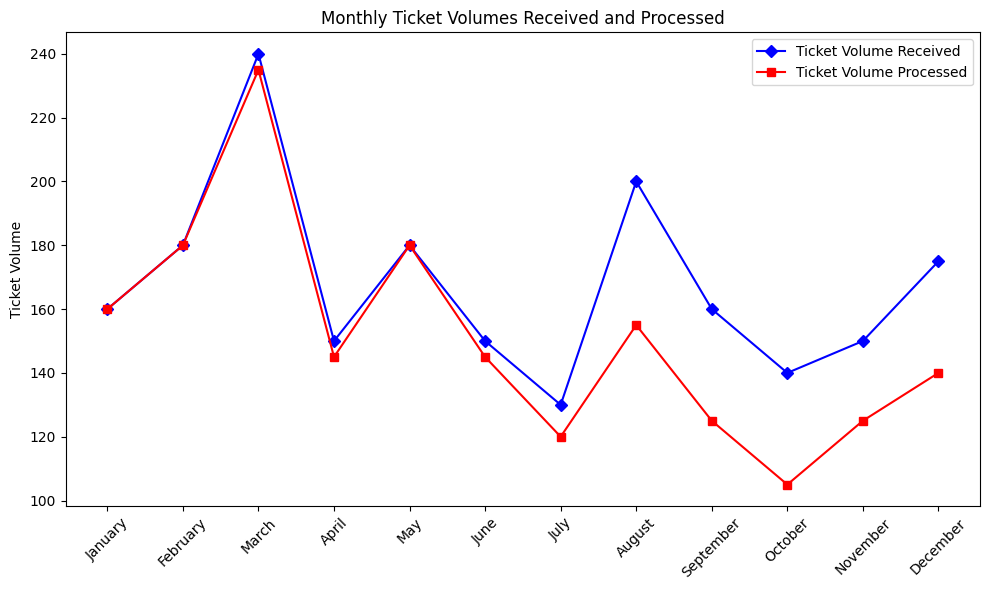

In [20]:
import matplotlib.pyplot as plt

months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

ticket_volume_received = [160, 180, 240, 150, 180, 150, 130, 200, 160, 140, 150, 175]
ticket_volume_processed = [160, 180, 235, 145, 180, 145, 120, 155, 125, 105, 125, 140]

plt.figure(figsize=(10, 6))
plt.plot(months, ticket_volume_received, marker='D', color='blue', label='Ticket Volume Received')
plt.plot(months, ticket_volume_processed, marker='s', color='red', label='Ticket Volume Processed')

plt.xticks(rotation=45)
plt.ylabel('Ticket Volume')
plt.title('Monthly Ticket Volumes Received and Processed')
plt.legend()
plt.tight_layout()
plt.show()
